In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.linalg import eigh_tridiagonal
from scipy.linalg import eigh
%matplotlib notebook
print('Saizalpreet Kaur')
print('2021PHY1003')

Saizalpreet Kaur
2021PHY1003


In [2]:
def simp(array,a,b):
        n=len(array)
        simp_sum=array[0]+array[-1]
        for i in range (1,n):
            if i%2==0:
                simp_sum+=2*array[i]
            else:
    
                simp_sum+=4*array[i]
        simp_sum*=(b-a)/(3*(n))
        return simp_sum   

In [3]:
#a
a=-1/2;b=1/2
n=250 #n is the number of internal grid points
h=(b-a)/(n+1) #step size
diag=[-2/(-h**2)]*(n) #diagonal elements of tridiag matrix
non_diag=[1/(-h**2)]*(n-1) #non-diag elements
w, v = eigh_tridiagonal(diag, non_diag) #w=eigenvalue, v=eigenvector
print('The first 10 eigenvalues are: ')
w_10=w[:10]
print(w_10) #first 10 eigenvalues
# print(v[0])

The first 10 eigenvalues are: 
[  9.86947556  39.47635611  88.81600358 157.88068861 246.65959182
 355.13880546 483.30133565 631.12710497 798.59295564 985.67265316]


<IPython.core.display.Javascript object>


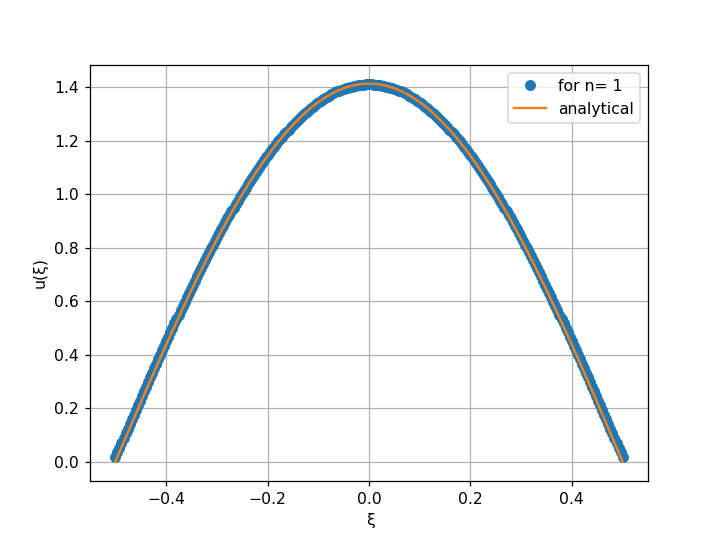

<IPython.core.display.Javascript object>


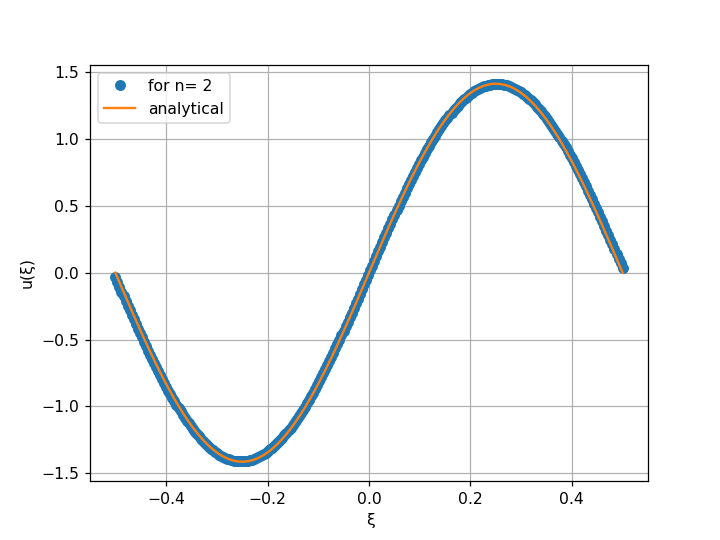

<IPython.core.display.Javascript object>


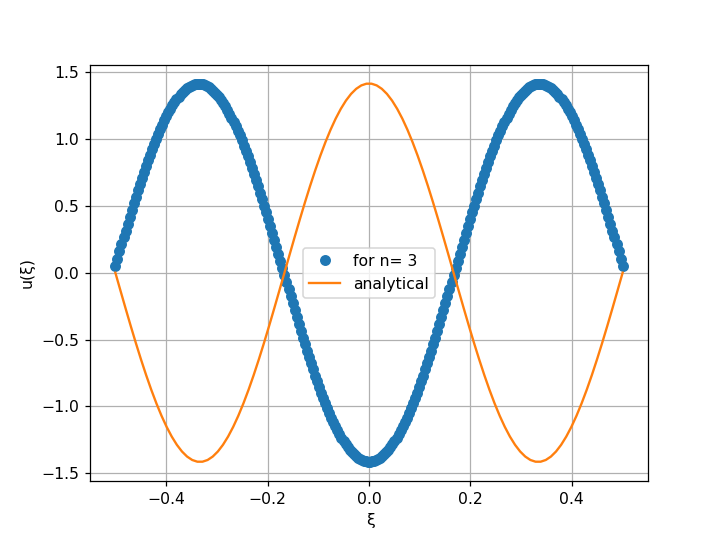

<IPython.core.display.Javascript object>


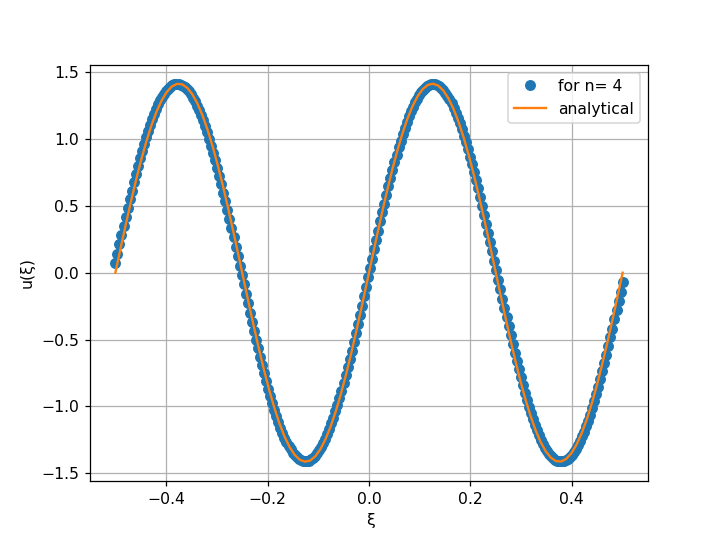

In [4]:
#b 
#f is the analytical solution of the wavefunction
def f_a(x,n):
    if n%2!=0:
        return np.sqrt(2)*np.cos(n*np.pi*x)
    if n%2==0:
        return np.sqrt(2)*np.sin(n*np.pi*x)
def normalization(u): #this function normalizes the eigenfunctions
    U=u**2
    L=u/np.sqrt(simp(U,-0.5,0.5))
    return L
xi=np.linspace(a,b,n)
Fcn=[]
for i in range(4):
    OO=v[:,i] #choosing the i_th eigenvector
    Sol=normalization(OO)
    Fcn.append(Sol)
    tt0=np.linspace(-1/2,1/2,100)
    sol=(f_a(tt0,i+1))
    plt.figure()
    plt.xlabel(' ξ');plt.ylabel('u(ξ)')
    plt.plot(xi,Sol,'o',label='for n= '+str(i+1))
    plt.plot(tt0,sol,'-', label='analytical')
    plt.grid();plt.legend()

<IPython.core.display.Javascript object>


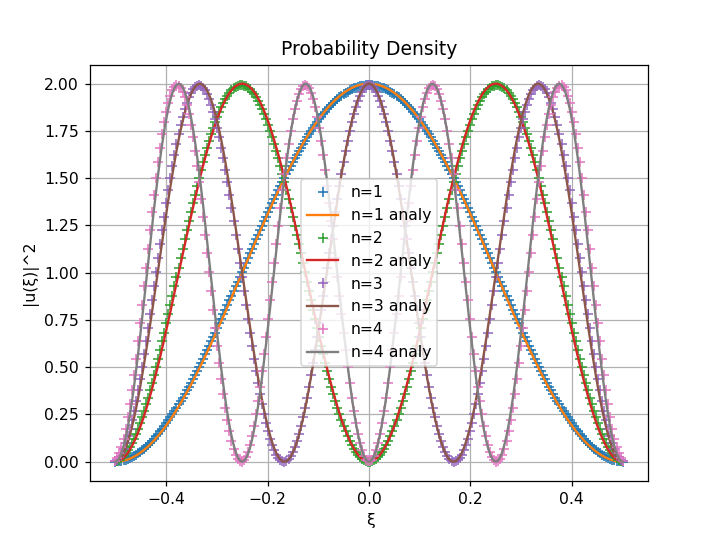

In [14]:
#c
plt.figure()
def prob_fun(x,n): # analytical probability function
    if n%2!=0:
        return abs(np.sqrt(2)*np.cos(n*np.pi*x))**2
    if n%2==0:
        return abs(np.sqrt(2)*np.sin(n*np.pi*x))**2
for i in range(4):
    plt.plot(xi,abs(Fcn[i])**2,'+',label='n='+str(i+1))
    plt.plot(xi,prob_fun(xi,i+1),label='n='+str(i+1)+' analy')
    plt.xlabel(' ξ');plt.ylabel('|u(ξ)|^2')
plt.legend()
plt.title('Probability Density')
plt.grid()

$$e_n= n^2 \pi^2$$

<IPython.core.display.Javascript object>


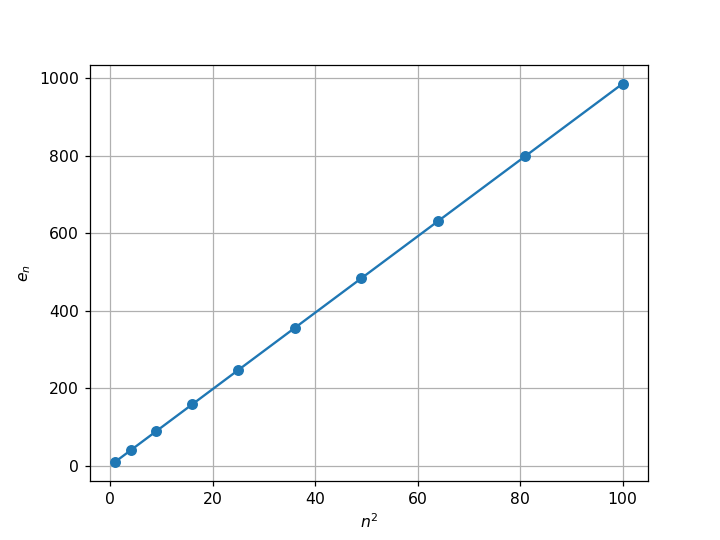

Slope from data =  9.857313663783552
Actual value    =  9.869604401089358


In [6]:
#d
N_sq=np.linspace(1,10,10)**2 # n^2 array
plt.figure()
plt.plot(N_sq,w_10,'o-')
plt.xlabel('$n^2$');plt.ylabel('$e_n$')
plt.grid()
def lsf(x,y): # least square fitting code
    if len(x) == len(y) :
        n = len(x)
        xy = [i*j for i,j in zip(x,y)]
        x_sq = [i**2 for i in x]
        sigma_x = sum(x)
        sigma_y = sum(y)
        sigma_xy = sum(xy)
        sigma_x_sq = sum(x_sq)
        slope = (n*sigma_xy - sigma_x*sigma_y)/(n*sigma_x_sq - sigma_x**2)
        intercept = (sigma_x_sq*sigma_y - sigma_x*sigma_xy)/(n*sigma_x_sq - sigma_x**2)
        return slope, intercept
    else:
        print('lists are not of same dimension.')

m,c = lsf(N_sq,w_10)
print('Slope from data = ',m)
print('Actual value    = ', np.pi**2)

In [7]:
#e_1
hc=197.3 #units= eV nm
mc_2=0.511 *10**6 # units= eV
L=0.5 # units= nm
Energy=np.round(w_10*hc**2/(2*mc_2*L**2),6)
EE=np.round(np.pi**2*N_sq*hc**2/(2*mc_2*L**2),6)
data={'Shell no. ': np.sqrt(N_sq),'$E_{num}$ (eV)': Energy, '$E_{analy}$ (eV)':EE}
table=pd.DataFrame(data)
display(table)

,Shell no.,$E_{num}$ (eV),$E_{analy}$ (eV)
0,1.0,1.503687,1.503706
1,2.0,6.014511,6.014825
2,3.0,13.531766,13.533356
3,4.0,24.054275,24.059300
4,5.0,37.580389,37.592657
5,6.0,54.107989,54.133426
6,7.0,73.634486,73.681607
7,8.0,96.156821,96.237201
8,9.0,121.671466,121.800208
9,10.0,150.174424,150.370627


In [8]:
#f1
mc_2=0.511 *10**6 #eV
L1=1 #nm
Energy1=np.round(w_10*hc**2/(2*mc_2*L1**2),6)
EE1=np.round(np.pi**2*N_sq*hc**2/(2*mc_2*L1**2),6)
data1={'Shell no. ': np.sqrt(N_sq),'$E_{num}$ (eV)': Energy1, '$E_{analy}$ (eV)':EE1}
table1=pd.DataFrame(data1)
display(table1)

,Shell no.,$E_{num}$ (eV),$E_{analy}$ (eV)
0,1.0,0.375922,0.375927
1,2.0,1.503628,1.503706
2,3.0,3.382942,3.383339
3,4.0,6.013569,6.014825
4,5.0,9.395097,9.398164
5,6.0,13.526997,13.533356
6,7.0,18.408622,18.420402
7,8.0,24.039205,24.059300
8,9.0,30.417867,30.450052
9,10.0,37.543606,37.592657


In [9]:
#f2
hc=197.3 #eV nm
mc_2_p=938.08*10**6 #eV
L2=5*10**(-6) #nm
Energy2=np.round(w_10*hc**2/(2*mc_2_p*L2**2),6)
EE2=np.round(np.pi**2*N_sq*hc**2/(2*mc_2_p*L2**2),6)
data2={'Shell no. ': np.sqrt(N_sq),'$E_{num}$ (eV)': Energy2, '$E_{analy}$ (eV)':EE2}
table2=pd.DataFrame(data2)
display(table2)

,Shell no.,$E_{num}$ (eV),$E_{analy}$ (eV)
0,1.0,8.191027e+06,8.191134e+06
1,2.0,3.276283e+07,3.276454e+07
2,3.0,7.371155e+07,7.372021e+07
3,4.0,1.310308e+08,1.310581e+08
4,5.0,2.047115e+08,2.047784e+08
5,6.0,2.947423e+08,2.948808e+08
6,7.0,4.011089e+08,4.013656e+08
7,8.0,5.237947e+08,5.242326e+08
8,9.0,6.627806e+08,6.634819e+08
9,10.0,8.180446e+08,8.191134e+08


In [10]:
#g
Fun=np.conj(Fcn[0]) # Fun=Fcn^*
exp_xi=simp(Fun*xi*Fcn[0],a,b)
exp_xi_sq=simp(Fun*xi**2*Fcn[0],a,b)
sigma_xi=np.sqrt(exp_xi_sq-exp_xi**2)
derv_u=[]
derv_u_sq=[]
for i in range(1,len(Fcn[0])-1):
    y=-1j*(Fcn[0][i+1]-Fcn[0][i-1])/(2*h)
    y_sq=(Fcn[0][i+1]-2*Fcn[0][i]+Fcn[0][i-1])/h**2
    derv_u.append(y)
    derv_u_sq.append(-1*y_sq)
p_sq=simp(Fun[0:248]*(derv_u_sq),a,b)
p=simp(Fun[0:248]*(derv_u),a,b)
print('p',exp_xi_sq)
# print(derv_u)
sigma_p=np.sqrt(p_sq-p**2)
print('∆ξ ∆ ̃p  ≥ 1/2')
print('∆ξ='+str(sigma_xi));print('∆ ̃p='+str(sigma_p))
print('∆ξ ∆ ̃p ='+str(sigma_xi*sigma_p)+' which is greater than 1/2')
print('Hence, the Uncertainity Principle (dimensionless) is satisfied')

p 0.03319971263024536
∆ξ ∆ ̃p  ≥ 1/2
∆ξ=0.18220788300749202
∆ ̃p=(3.154334902630068+0j)
∆ξ ∆ ̃p =(0.5747446849048682+0j) which is greater than 1/2
Hence, the Uncertainity Principle (dimensionless) is satisfied


In [15]:
#h
v_sq=(Fcn[0]**2) # squaring the wavefunction= prob densioty
x0=-1/4;xf=1/4
print('The probability of finding the particle in range (-1/4,1/4) is: ')
print(simp(v_sq,-1/4,1/4))

The probability of finding the particle in range (-1/4,1/4) is: 
0.5000000000000001
